In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/data_stand.csv'
data = pd.read_csv(path)

data.shape

(1431, 11)

In [3]:
data.head()

,평균기온,일강수량,평균풍속,최다풍향,평균현지기압,평균전운량,베이징PM2.5,베이징PM10,교통량,화력발전량,미세먼지
0,0.963266,-0.267740,-1.126942,-0.946219,-0.738590,0.608248,1.140874,0.620564,1.287904,-0.427073,0.456948
1,0.405473,-0.267740,0.558985,-1.548068,0.233002,-0.640583,0.958178,1.840345,1.227601,-0.922350,-0.503110
2,0.513117,0.946836,-0.737882,-1.548068,-0.495692,1.166935,0.633385,2.722740,-0.673777,-1.038422,-0.534080
3,0.385901,0.321686,0.948045,0.618588,-0.896473,-0.969223,1.303270,1.061761,1.213395,-0.565692,0.023373
4,0.503331,-0.267740,0.429298,0.137109,-0.762879,-1.297863,1.222072,0.620564,1.319340,-0.450406,1.386037


In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def visualize_pca(column1):
    # 주성분 분석을 위해 선택한 열과 미세먼지 데이터 선택
    X = data[[column1, '미세먼지']].values

    # PCA 모델 생성 및 주성분 계산
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)

    # 주성분으로 구성된 데이터프레임 생성
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # 폰트 설정
    font_path = '/content/drive/MyDrive/malgunbd.ttf' 
    fontprop = fm.FontProperties(fname=font_path, size=12)

    # 시각화
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], s=3)
    plt.xlabel(column1, fontproperties=fontprop)
    plt.ylabel('미세먼지', fontproperties=fontprop)

    plt.show()

def calculate_correlation(column1):
    # 주성분 분석을 위해 선택한 열과 미세먼지 데이터 선택
    X = data[[column1, '미세먼지']].values

    # PCA 모델 생성 및 주성분 계산
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)

    # 주성분과의 상관관계 계산
    correlation = np.corrcoef(X[:, 0], principal_components[:, 0])[0, 1]

    # 결과 출력
    print(f"{column1}과 미세먼지의 주성분과의 상관관계: {correlation:.3f}")

In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def visualize_pca(column1):
    # 주성분 분석을 위해 선택한 열과 미세먼지 데이터 선택
    X = data[[column1, '미세먼지']].values

    # PCA 모델 생성 및 주성분 계산
    pca = PCA(n_components = 2) # feature 변수 개수가 2개
    pca.fit(X)
    print(column1, ":", [round(x, 3) for x in pca.explained_variance_]) # 이것은 eigen value를 의미함
    PCscore = pca.transform(X)
    PCscore[0:5] # X의 자료에 eigen vector를 곱한 값, 새로운 공간에서 좌표값으로 나타남
    # PC score 구하기
    eigens_v = pca.components_.transpose()
    # column vector가 eigen vector가 되도록 transpose()
    # PCscore를 구하기위해 eigen vector를 곱하기 전에 centering 작업
    mX = np.matrix(X)
    for i in range(X.shape[1]):
      mX[:,i] = mX[:,i]-np.mean(X[:,i])
      dfmX = pd.DataFrame(mX)
    # PC score를 구하기 위해 eigen vector를 곱함
    (mX * eigens_v)[0:5]

    # PC score scatter
    plt.scatter(PCscore[:,0],PCscore[:,1], s=3) # 0-X축 / 1-Y축
    plt.show()

    # 폰트 설정
    font_path = '/content/drive/MyDrive/malgunbd.ttf' 
    fontprop = fm.FontProperties(fname=font_path, size=12)

    # centering된 원래 데이터
    plt.scatter(dfmX[0],dfmX[1], s=3)
    plt.show()



평균기온 : [1.312, 0.69]


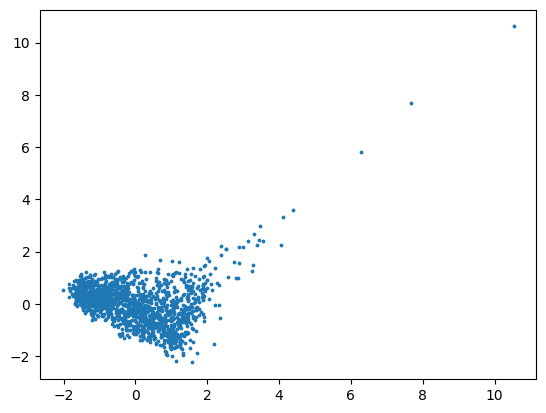

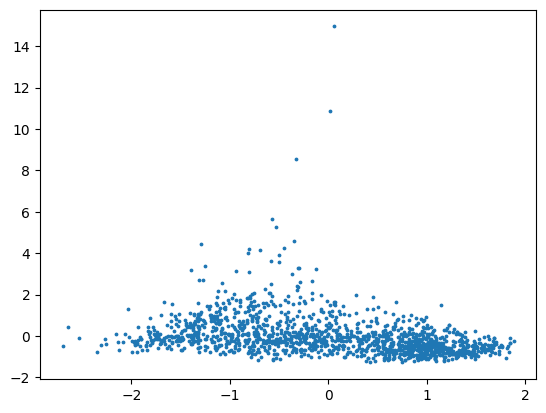

일강수량 : [1.153, 0.848]


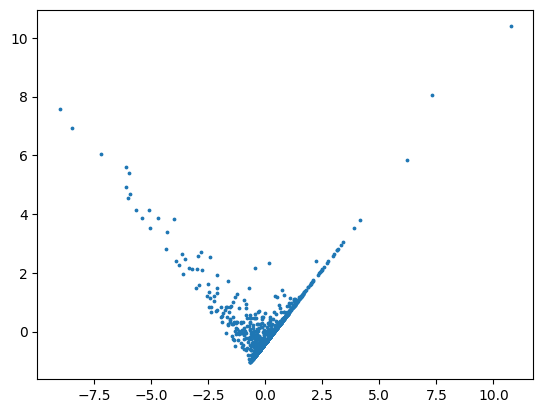

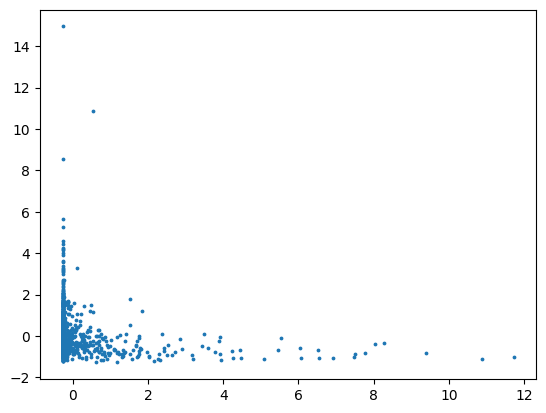

평균풍속 : [1.182, 0.82]


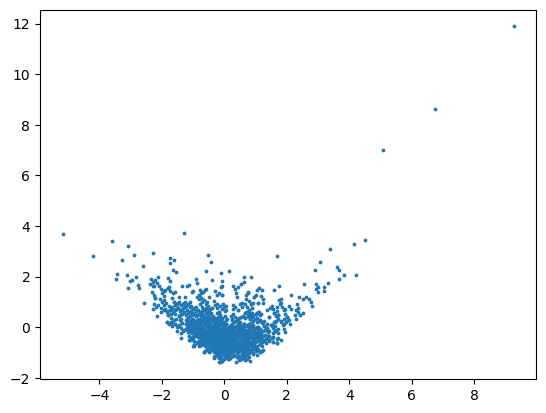

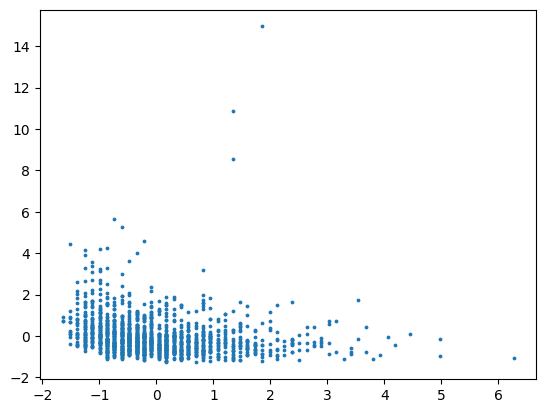

최다풍향 : [1.152, 0.849]


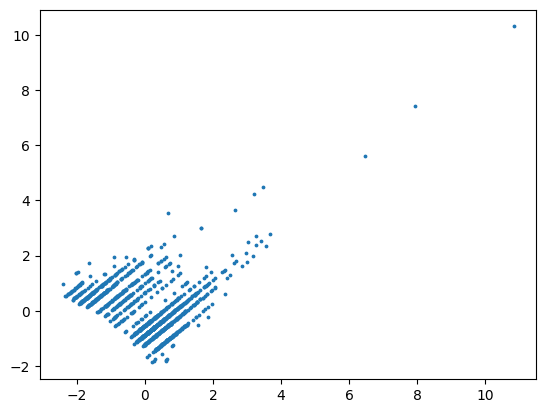

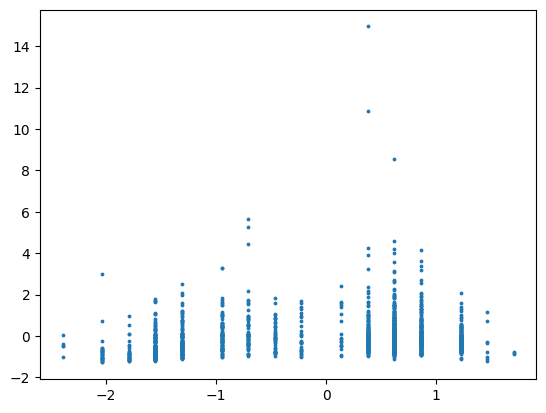

평균현지기압 : [1.231, 0.77]


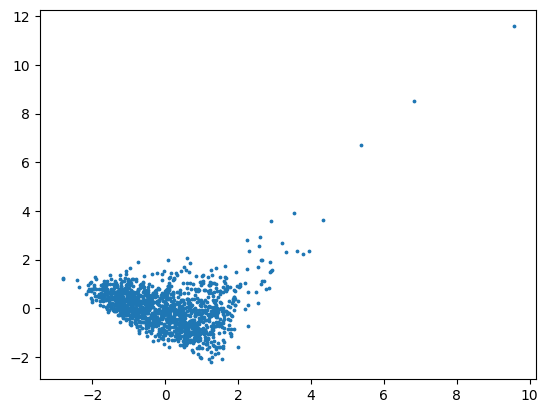

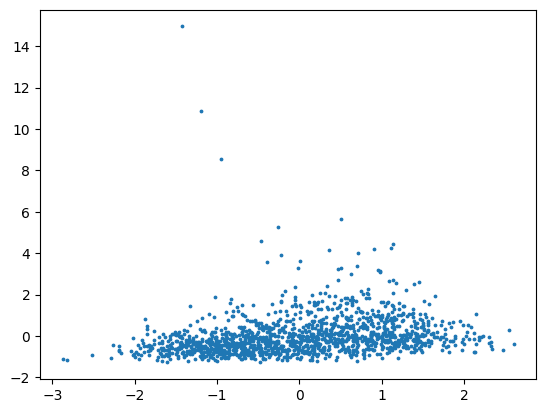

평균전운량 : [1.11, 0.892]


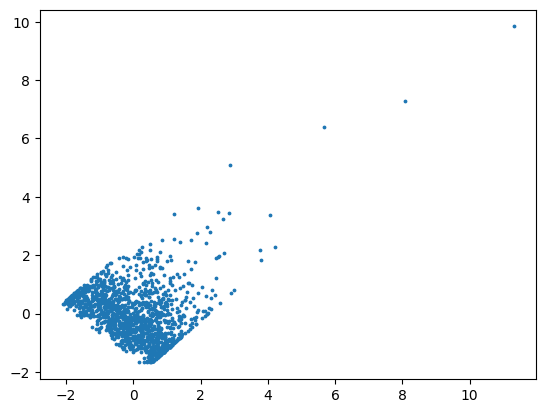

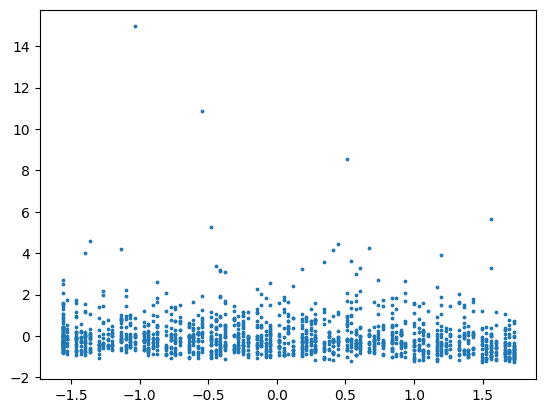

베이징PM2.5 : [1.24, 0.762]


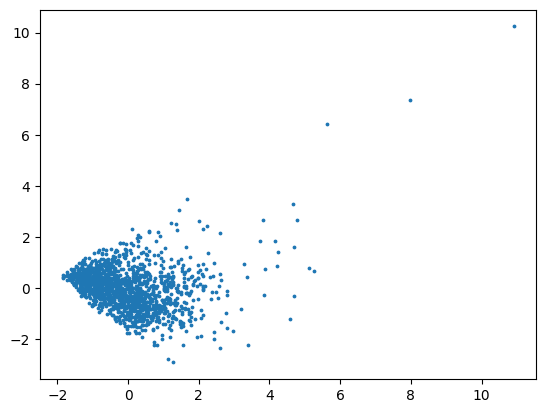

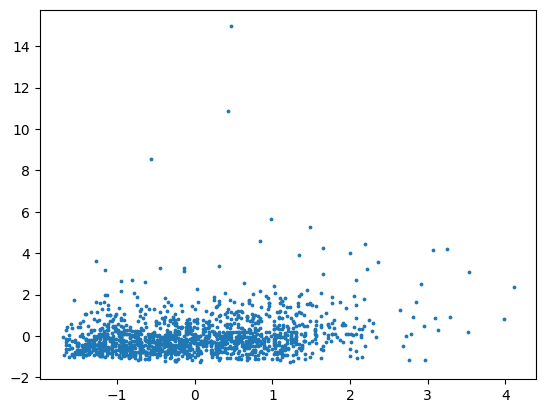

베이징PM10 : [1.215, 0.786]


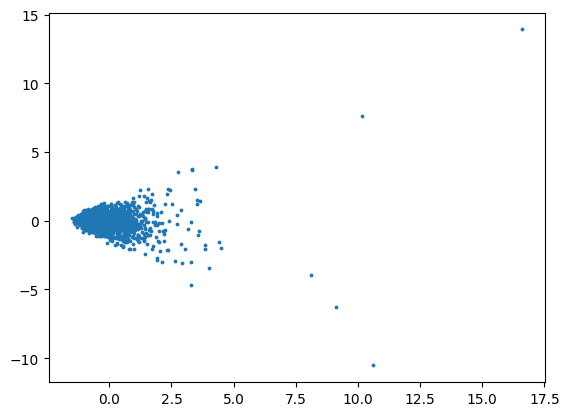

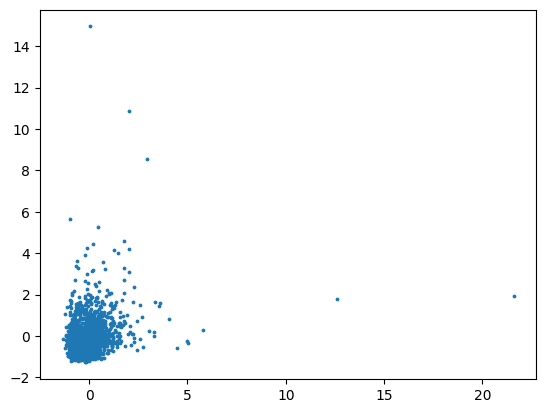

교통량 : [1.06, 0.941]


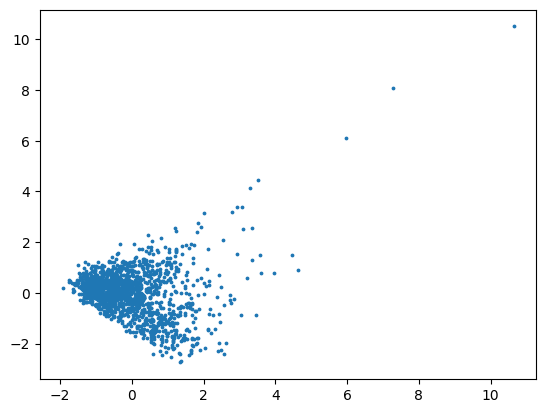

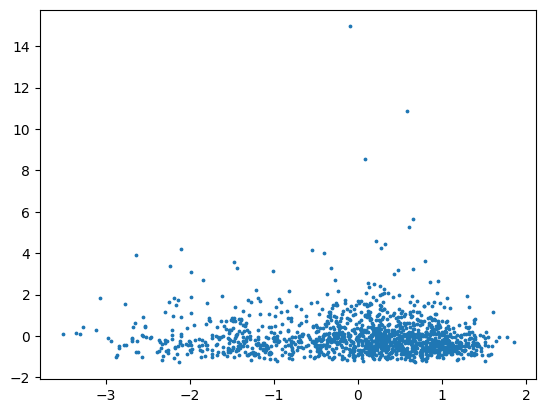

화력발전량 : [1.189, 0.813]


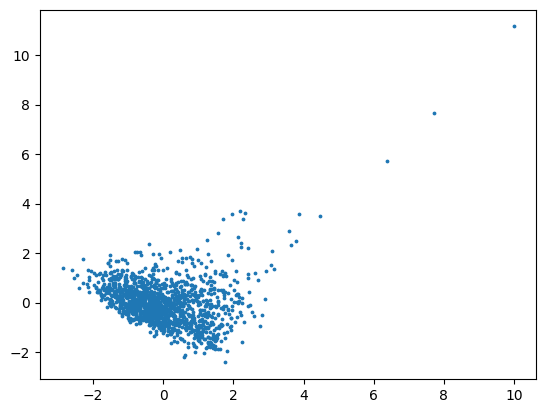

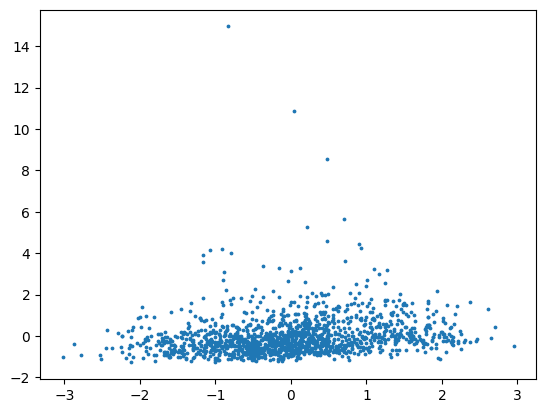

미세먼지 : [2.001, 0.0]


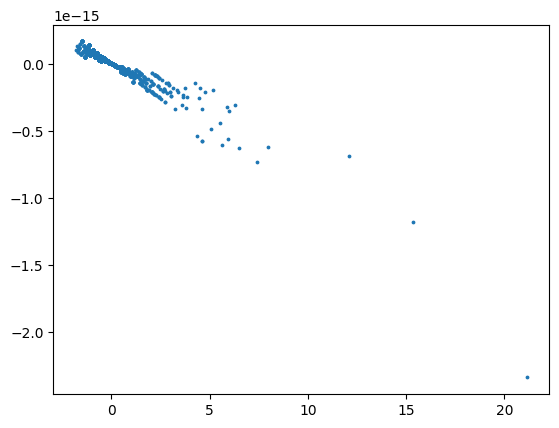

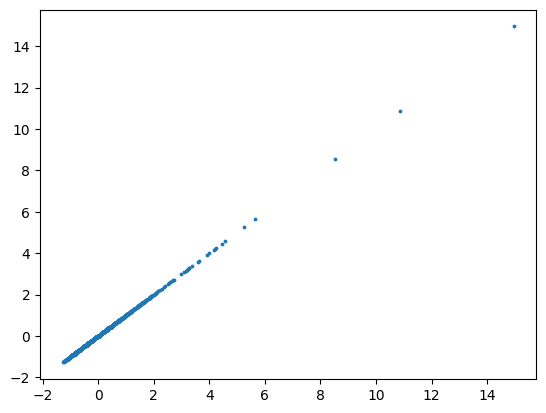

In [36]:
for column in data.columns:
  #if column != '미세먼지':
    visualize_pca(column)